In [1]:
%matplotlib inline
import math
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pickle

In [26]:
plt.rcParams['figure.figsize'] = 16, 14
plt.rcParams['axes.labelsize']=92
plt.rcParams['xtick.labelsize']=72
plt.rcParams['ytick.labelsize']=72
plt.rcParams['legend.loc']='lower right'
plt.rcParams['legend.fontsize'] = 48
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 1
plt.rcParams['grid.color'] = 'k'
plt.rcParams['boxplot.boxprops.linewidth'] = 10
plt.rcParams['boxplot.whiskerprops.linewidth']=10
plt.rcParams['boxplot.flierprops.markeredgewidth']=15
plt.rcParams['boxplot.capprops.linewidth'] =10
plt.rcParams['boxplot.medianprops.color']='C1'
plt.rcParams['boxplot.medianprops.linewidth'] =10
plt.rcParams['boxplot.meanprops.markersize'] = 20

In [27]:
modes = ['ind', 'iden', 'uni', 'fsum', 1, 0.999, 0.99, 0.9, 0.75, 0.5, 0.25, 0.1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 0]
mode_names = ['ind', 'iden', 'uni', 'fsum', 1, 0.999, 0.99, 0.9, 0.75, 0.5, 0.25, 0.1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 0]
modes2 = [0.1, 1e-2, 1e-3, 1e-4, 0]
mode_names2 = ['0.1', '1e-2', '1e-3', '1e-4', 0]

In [28]:
data = []
for i in range(11,21):
    data_path = './data/oneway_marginal_vary_n256_k20_t10_tol0.01_run{}.pkl'.format(i)
    fo = open(data_path, 'rb')
    data.append(pickle.load(fo))
    fo.close()

In [29]:
total_errors = data[0]['total_errors']
max_ratio_errors = data[0]['max_ratio_errors']
inters = data[0]['inters']

In [30]:
for i in range(1,10):
    total_errors = total_errors.append(data[i]['total_errors'], ignore_index=True)
    max_ratio_errors = max_ratio_errors.append(data[i]['max_ratio_errors'], ignore_index=True)
    inters = inters.append(data[i]['inters'], ignore_index=True)

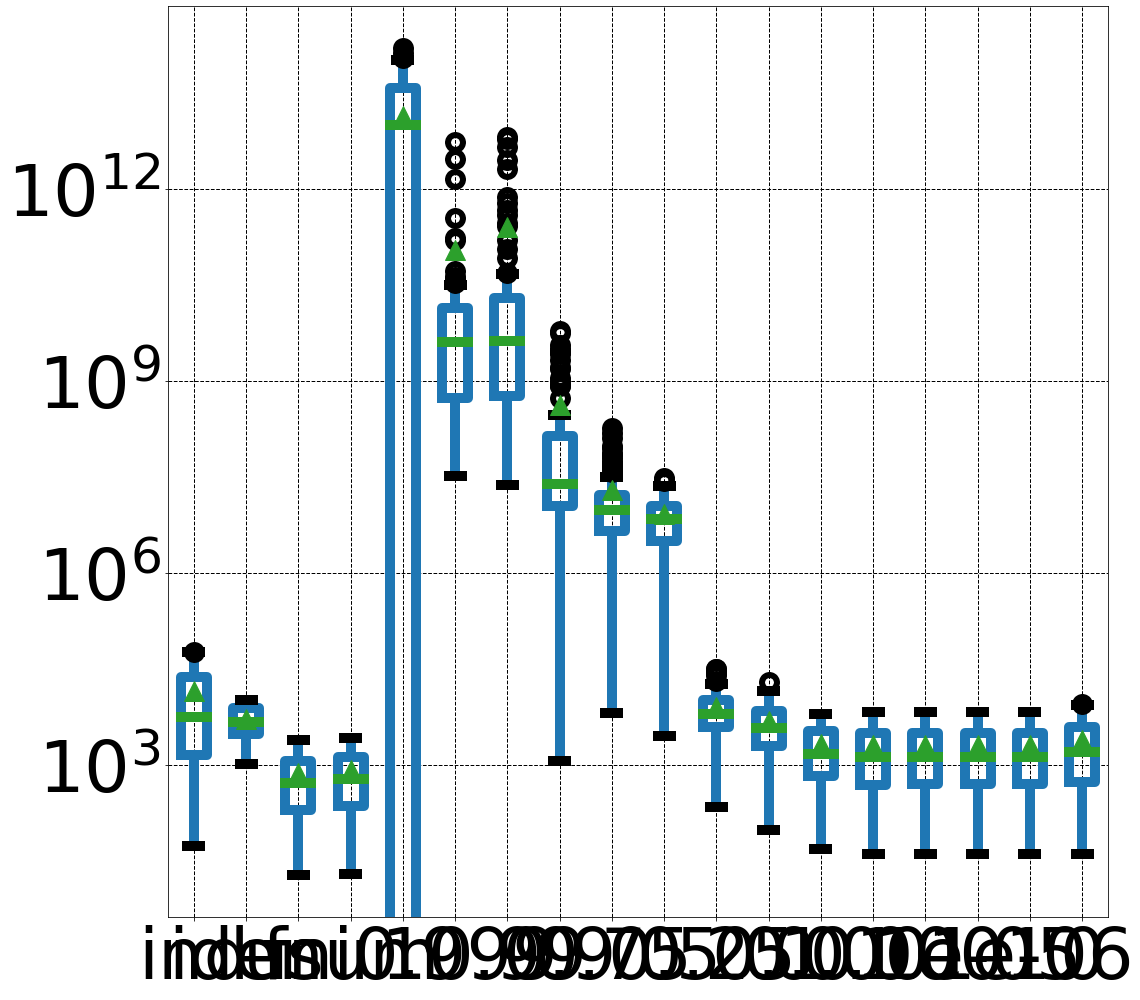

In [31]:
total_errors.boxplot(column = modes, showmeans=True, meanprops={'color':'C3'})
plt.xticks(range(1,len(modes)+1), mode_names)
plt.yscale('log')
#plt.ylabel('Total Error')
plt.tight_layout()
#plt.savefig('marginal_total_errors.pdf', bbox_inches='tight')
plt.show()

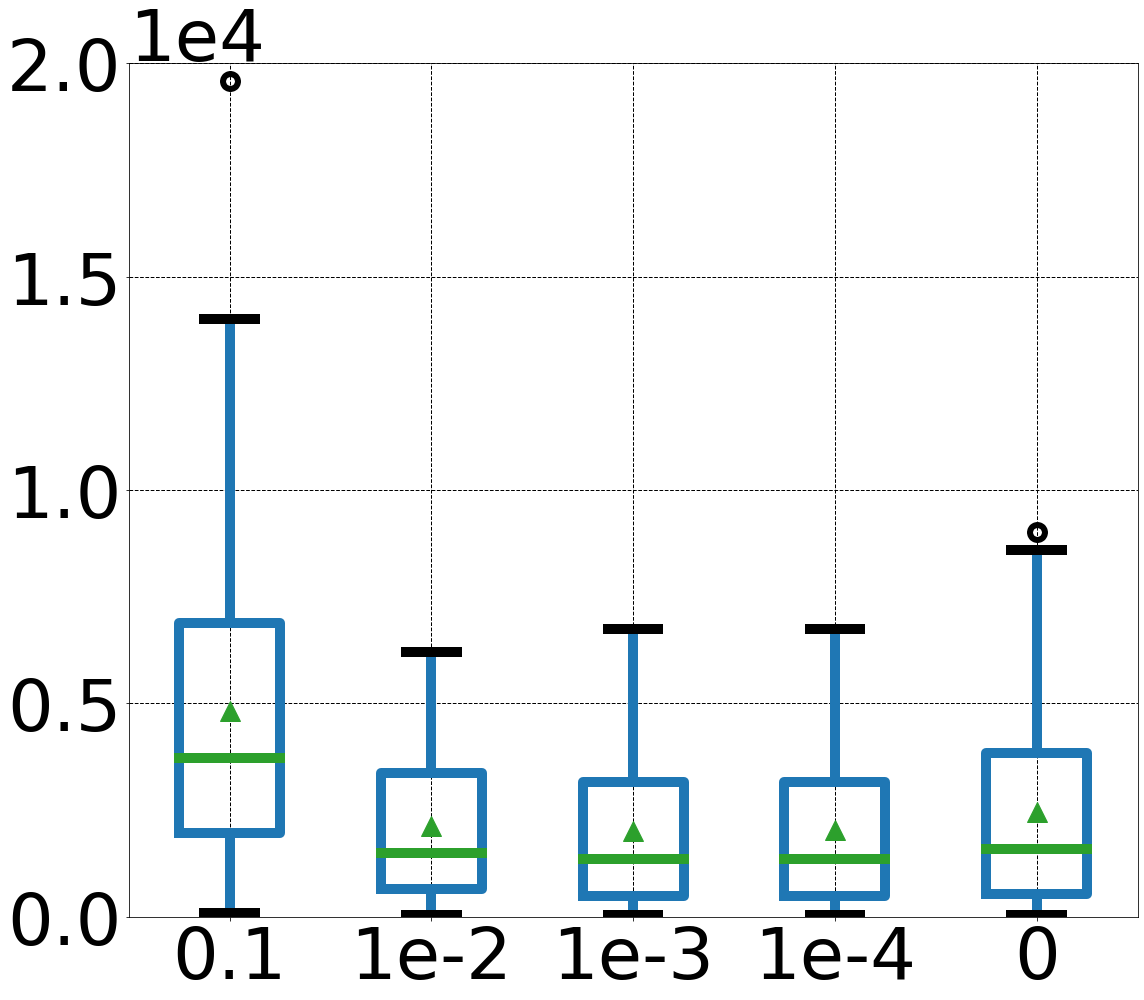

In [32]:
total_errors.boxplot(column = modes2, showmeans=True, meanprops={'color':'C3'})
plt.xticks(range(1,len(modes2)+1), mode_names2)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylim((0, 20000))
#plt.yscale('log')
#plt.ylabel('Total Error')
plt.tight_layout()
plt.savefig('tol_marginal_total_errors.pdf', bbox_inches='tight')
plt.show()

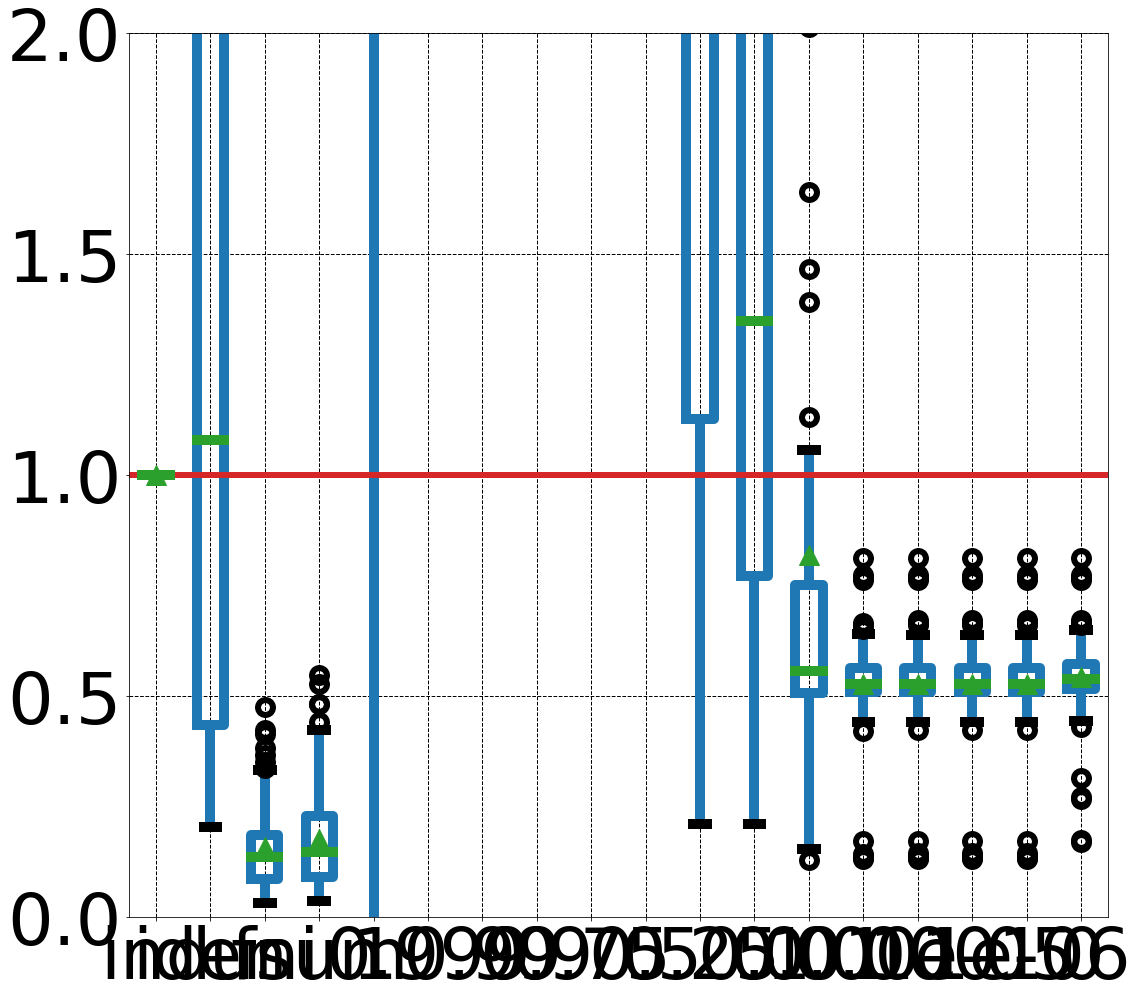

In [33]:
max_ratio_errors.boxplot(column = modes, showmeans=True)
plt.xticks(range(1,len(modes)+1), mode_names)
plt.ylim((0,2))
#plt.ylabel('Max Ratio Error')
plt.axhline(y=1, color='C3', linewidth=6)
plt.tight_layout()
#plt.savefig('marginal_max_ratio_errors.pdf', bbox_inches='tight')
plt.show()

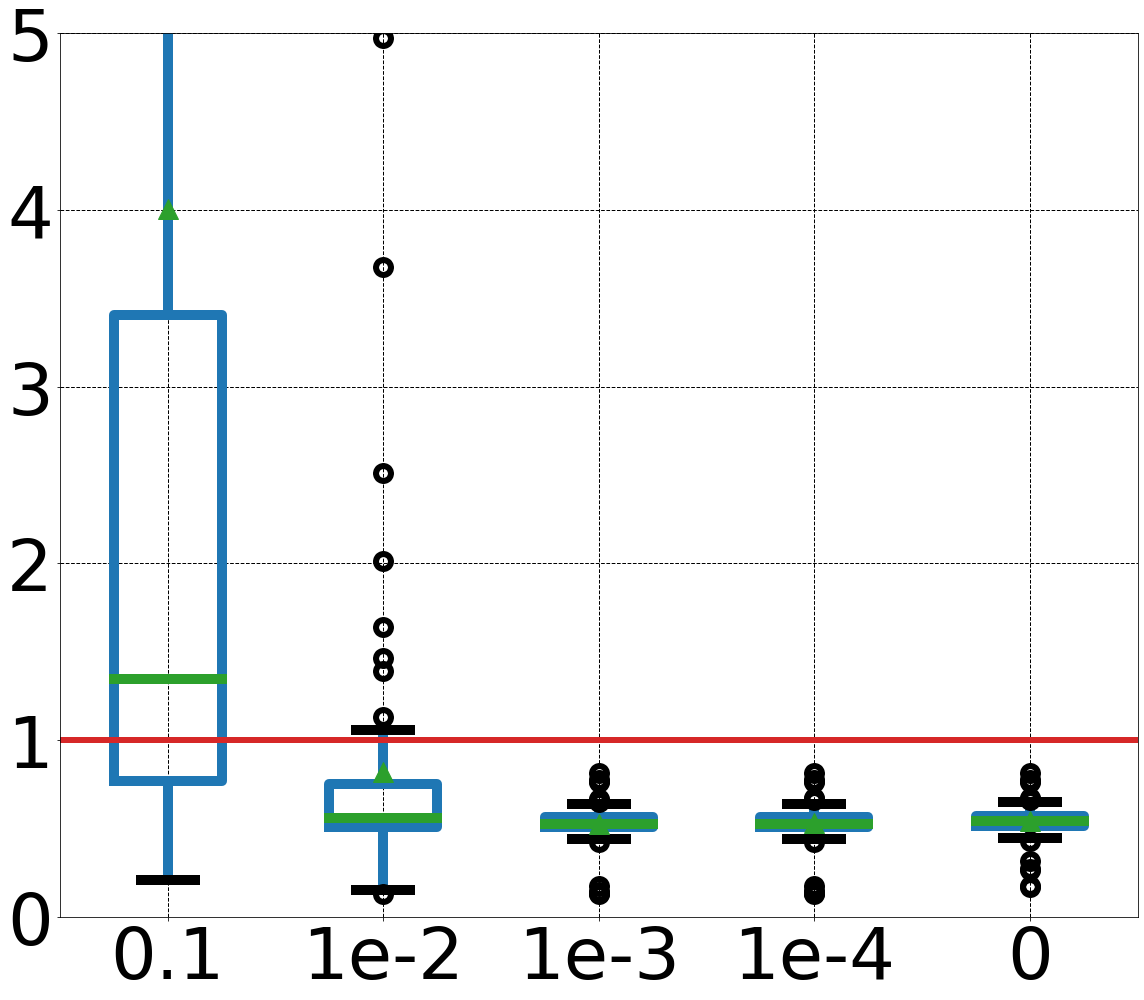

In [34]:
max_ratio_errors.boxplot(column = modes2, showmeans=True)
plt.xticks(range(1,len(modes2)+1), mode_names2)
plt.ylim((0,5))
#plt.ylabel('Max Ratio Error')
plt.axhline(y=1, color='C3', linewidth=6)
plt.tight_layout()
plt.savefig('tol_marginal_max_ratio_errors.pdf', bbox_inches='tight')
plt.show()

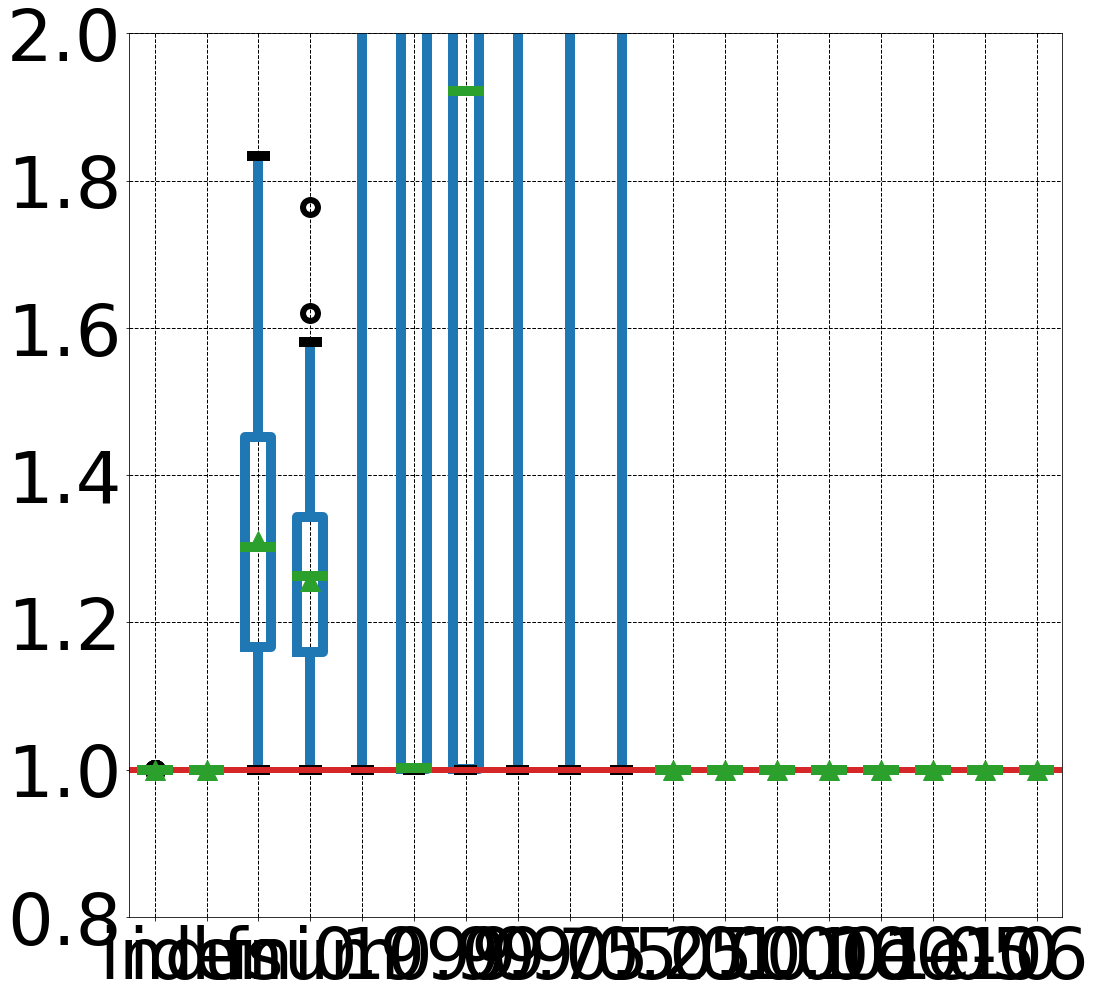

In [35]:
inters2 = inters+1
inters2.boxplot(column = modes, showmeans=True)
plt.xticks(range(1,len(modes)+1), mode_names)
plt.ylim((0.8,2))
plt.axhline(y=1, color='C3', linewidth=6)
#plt.yscale('log')
#plt.ylabel('Interferences')
plt.tight_layout()
#plt.savefig('marginal_inters.pdf', bbox_inches='tight')
plt.show()

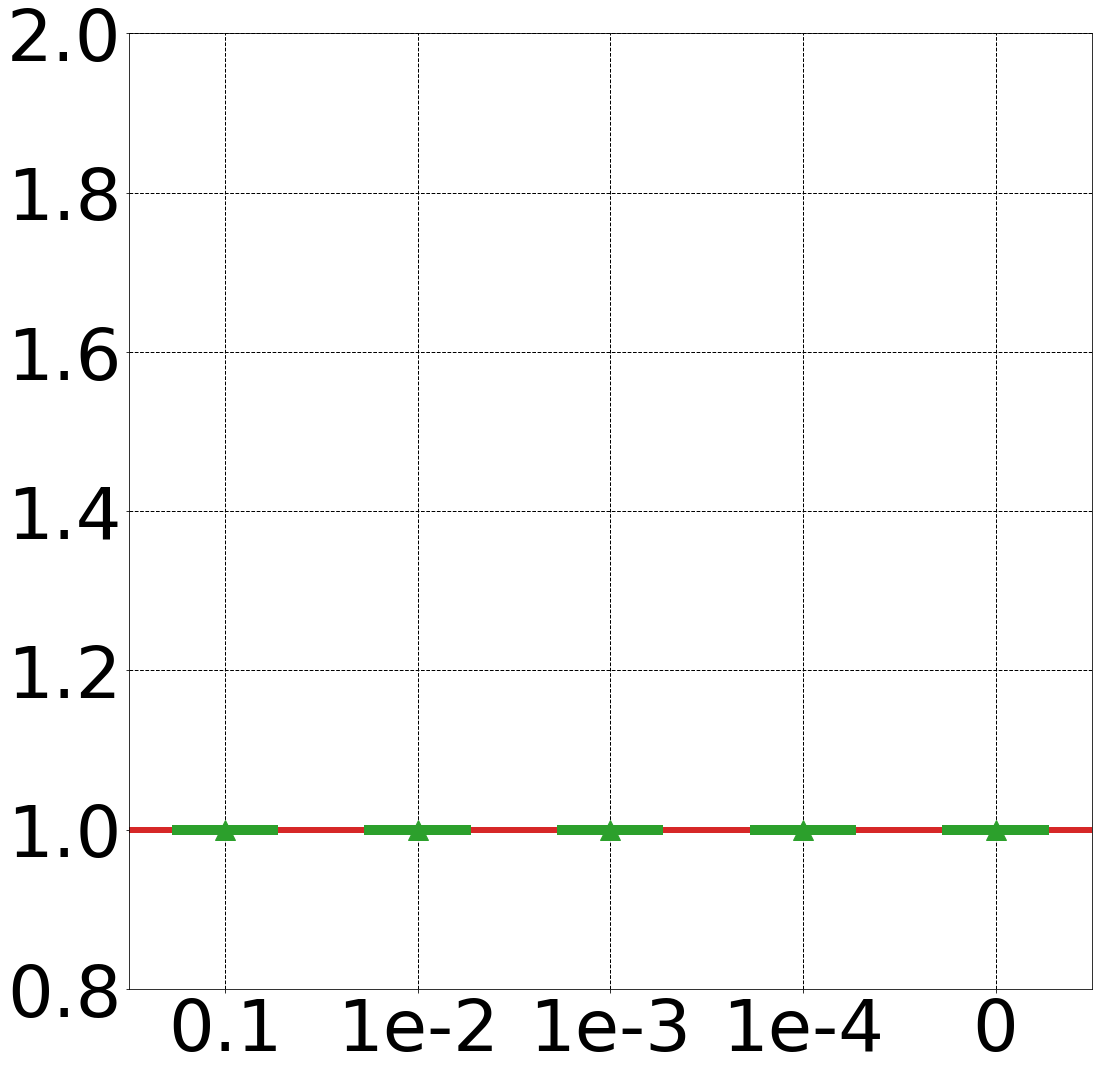

In [23]:
inters2 = inters+1
inters2.boxplot(column = modes2, showmeans=True)
plt.xticks(range(1,len(modes2)+1), mode_names2)
plt.ylim((0.8,2))
plt.axhline(y=1, color='C3', linewidth=6)
#plt.yscale('log')
#plt.ylabel('Interferences')
plt.tight_layout()
#plt.savefig('marginal_inters.pdf', bbox_inches='tight')
plt.show()

In [63]:
data2 = []
for i in range(1,11):
    data2_path = './data/race_vary_k20_t10_ty4_tol0.001_run{}.pkl'.format(i)
    fo = open(data2_path, 'rb')
    data2.append(pickle.load(fo))
    fo.close()

FileNotFoundError: [Errno 2] No such file or directory: './data/race_vary_k20_t10_ty4_tol0.001_run1.pkl'

In [11]:
total_errors2 = data2[0]['total_errors']
max_ratio_errors2 = data2[0]['max_ratio_errors']
inters2 = data2[0]['inters']

In [72]:
for i in range(1,10):
    total_errors2 = total_errors2.append(data2[i]['total_errors'], ignore_index=True)
    max_ratio_errors2 = max_ratio_errors2.append(data2[i]['max_ratio_errors'], ignore_index=True)
    inters2 = inters2.append(data2[i]['inters'], ignore_index=True)

In [73]:
water1 = total_errors['buc_qsd']
water2 = total_errors2['buc_qsd']

In [40]:
water = pd.concat((water1, water2), axis=1,ignore_index=True)
ratio_err = max_ratio_errors['buc_qsd'].to_numpy()
water

,0,1
0,50804.586827,50804.586827
1,22721.242131,42864.253624
2,45416.931017,17427.086668
3,2541.137075,6762.145869
4,12216.416728,12711.525129
...,...,...
95,2465.428694,21012.962629
96,87205.179010,13007.322729
97,2197.386634,20278.197802
98,41120.389382,52205.291392


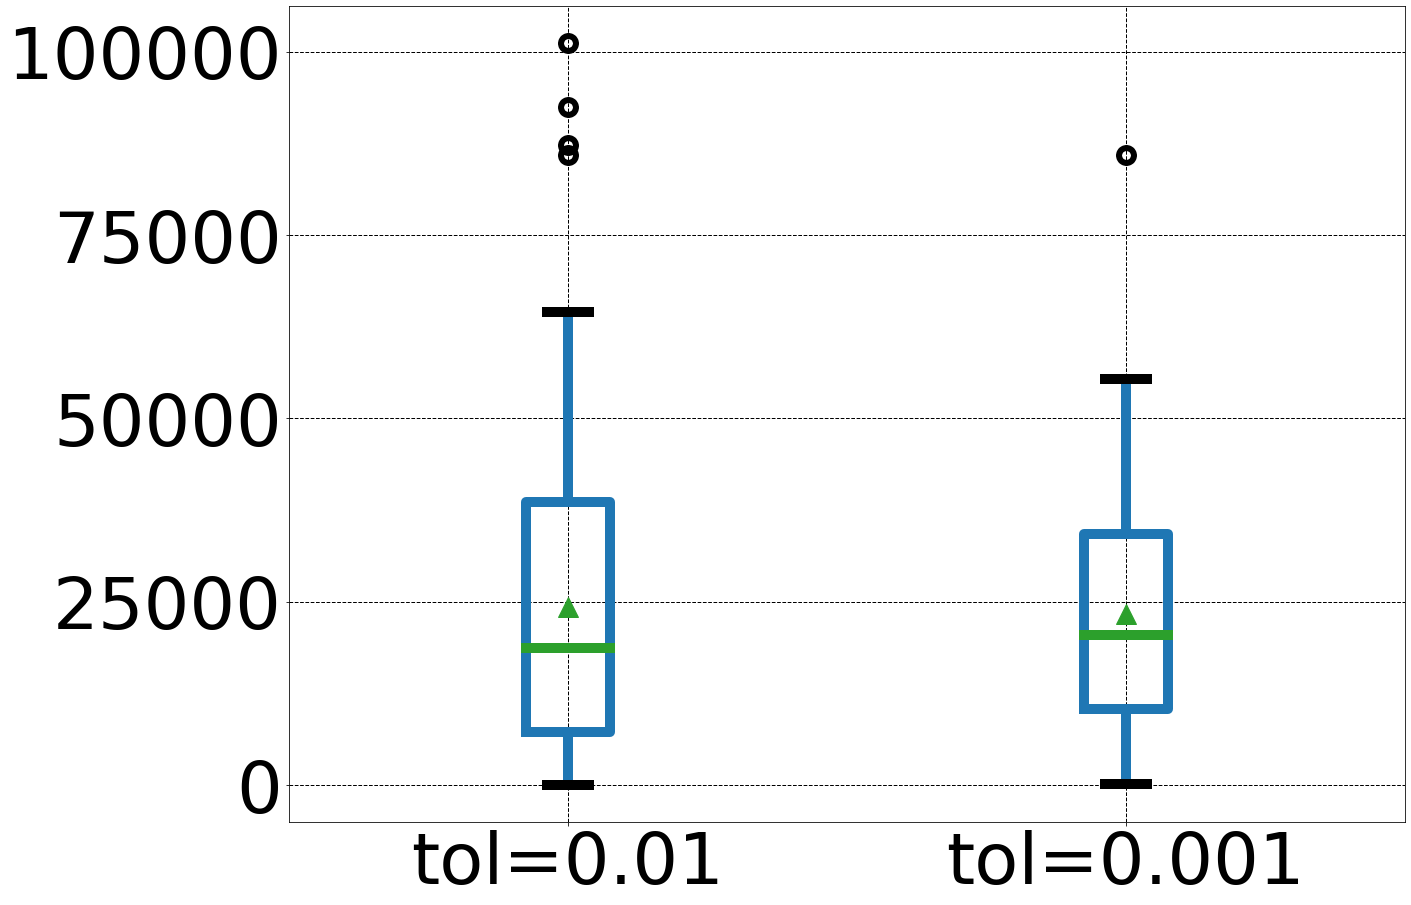

In [43]:
water.boxplot(showmeans=True)
plt.xticks(range(1,3), ['tol=0.01', 'tol=0.001'])
plt.show()

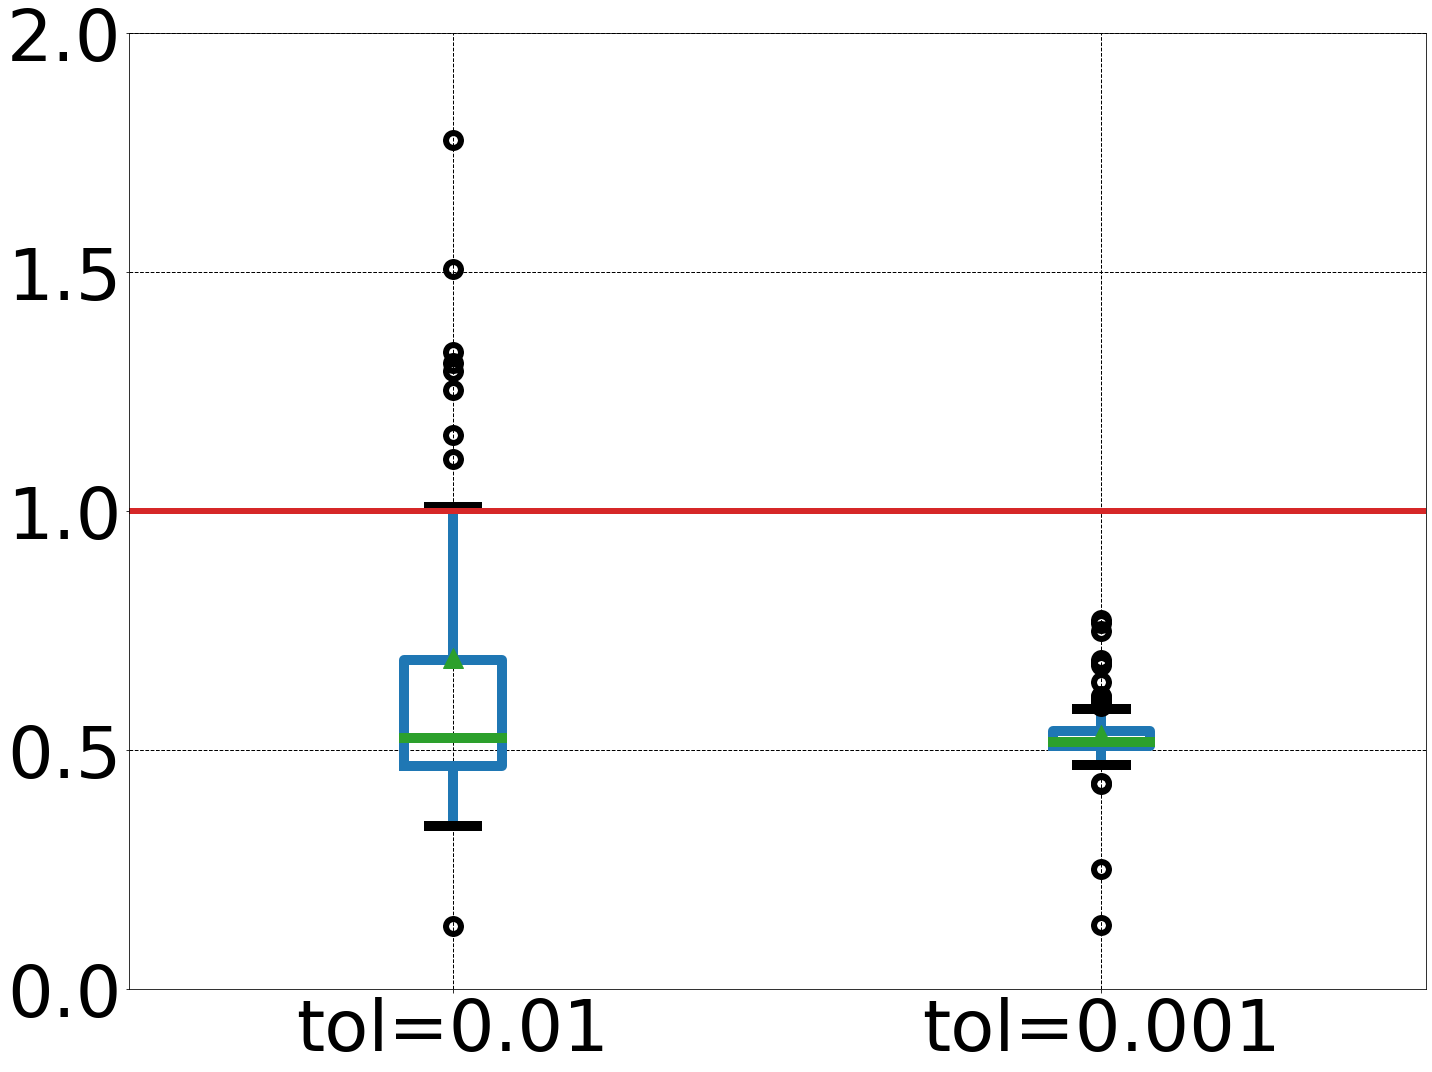

In [141]:
max_ratio_errors.boxplot(column = modes3, showmeans=True)
plt.xticks(range(1,len(modes3)+1), mode_names3)
plt.ylim((0,2))
#plt.ylabel('Max Ratio Error')
plt.axhline(y=1, color='C3', linewidth=6)
plt.tight_layout()
#plt.savefig('prac_max_ratio_errors.pdf', bbox_inches='tight')
plt.show()

In [143]:
water = max_ratio_errors['buc_qsd'].to_numpy()
ind = np.arange(100)[water > 1]

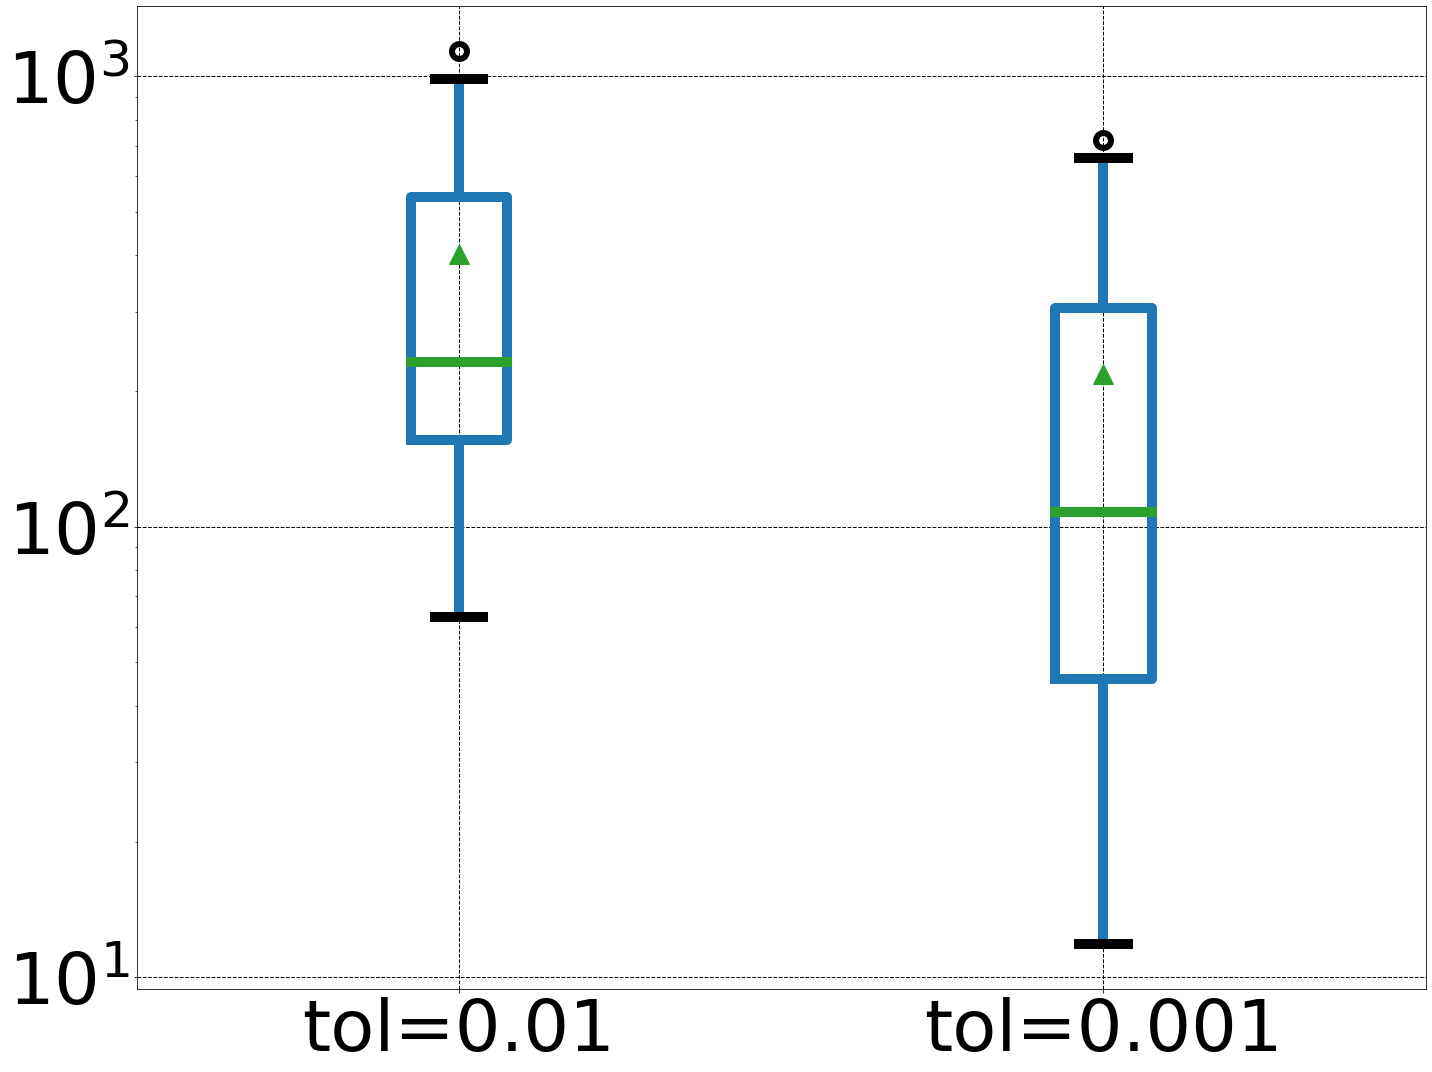

In [144]:
total_errors.loc[ind].boxplot(column = modes3, showmeans=True, meanprops={'color':'C3'})
plt.xticks(range(1,len(modes3)+1), mode_names3)
plt.yscale('log')
#plt.ylabel('Total Error')
plt.tight_layout()
#plt.savefig('prac_total_errors.pdf', bbox_inches='tight')
plt.show()